# Euler's Method

## Overview

**Euler's Method** is the simplest numerical method for solving ordinary differential equations (ODEs). It is a first-order method, meaning the local error is proportional to the step size squared.

## Mathematical Formulation

Consider a first-order ODE:
$$\frac{dx}{dt} = f(t, x)$$

with initial condition $x(t_0) = x_0$.

### Derivation

Using the forward difference approximation for the derivative:
$$\frac{x(t + \Delta t) - x(t)}{\Delta t} \approx f(t, x)$$

Rearranging gives us the update formula:
$$x_{n+1} = x_n + \Delta t \cdot f(t_n, x_n)$$

### Algorithm

1. Set initial condition: $x_0 = x(t_0)$
2. For each step $n = 0, 1, 2, ..., N-1$:
   - Compute slope: $k = f(t_n, x_n)$
   - Update: $x_{n+1} = x_n + \Delta t \cdot k$

### Error Analysis

| Error Type | Order |
|------------|-------|
| Local Truncation Error | $O(\Delta t^2)$ |
| Global Error | $O(\Delta t)$ |

## Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Problem

We solve the ODE:
$$\frac{dx}{dt} = \sin(t), \quad x(1) = 2$$

The analytical solution is:
$$x(t) = -\cos(t) + 2 + \cos(1)$$

In [3]:
# Number of discretization points
N = 10

# Time domain [t_start, t_end]
domain = [1, 5]

# ODE: dx/dt = f(t, x)
def f(t, x):
    return np.sin(t)

# Analytical solution for comparison
def analytical(t):
    return -np.cos(t) + 2 + np.cos(1)

# Initial condition
x_0 = 2.0

### Euler's Method Function

In [4]:
def euler_method(t: np.ndarray, f: callable, x_0: float) -> np.ndarray:
    """
    Solve an ODE using Euler's method.
    
    Args:
        t: Array of time points (must be uniformly spaced)
        f: Function f(t, x) defining the ODE dx/dt = f(t, x)
        x_0: Initial condition x(t[0]) = x_0
    
    Returns:
        Array of solution values at each time point
    """
    dt = t[1] - t[0]  # Time step
    x = np.zeros_like(t)
    
    # Apply initial condition
    x[0] = x_0
    
    # Iterate through time steps
    for n in range(len(t) - 1):
        # Euler step: x_{n+1} = x_n + dt * f(t_n, x_n)
        x[n + 1] = x[n] + dt * f(t[n], x[n])
    
    return x

### Solve and Visualize

In [5]:
# Create time grid
t = np.linspace(*domain, num=N)

# Solve using Euler's method
x_numerical = euler_method(t, f, x_0)

# Create fine grid for analytical solution
t_fine = np.linspace(*domain, num=500)

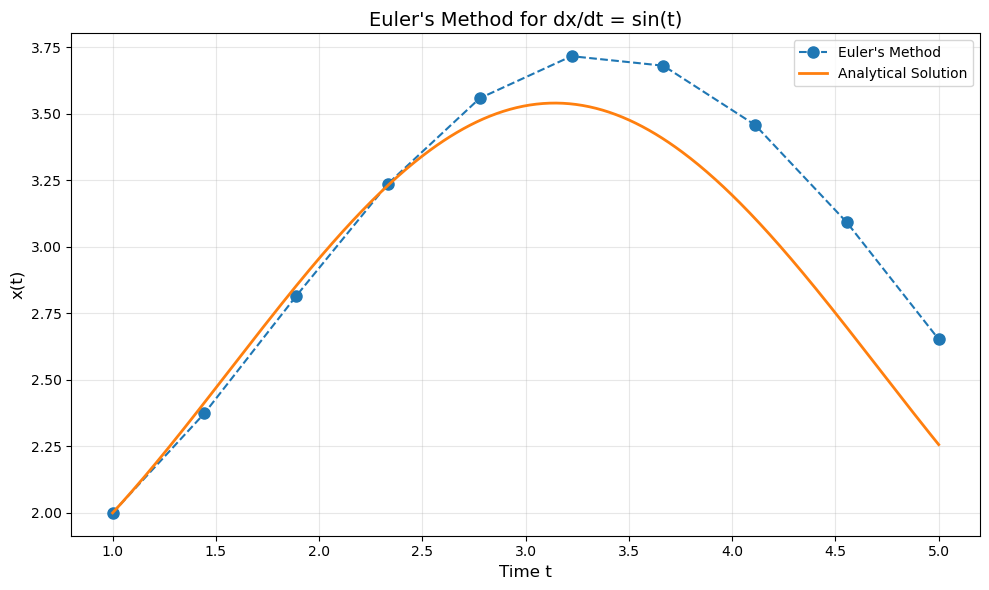

In [6]:
plt.figure(figsize=(10, 6))

# Plot numerical solution
plt.plot(t, x_numerical, 'o--', label="Euler's Method", markersize=8)

# Plot analytical solution
plt.plot(t_fine, analytical(t_fine), '-', label='Analytical Solution', linewidth=2)

plt.xlabel('Time t', fontsize=12)
plt.ylabel('x(t)', fontsize=12)
plt.title("Euler's Method for dx/dt = sin(t)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Error Analysis

In [7]:
# Compute error at each point
error = np.abs(x_numerical - analytical(t))

print(f"Maximum absolute error: {np.max(error):.6f}")
print(f"Mean absolute error: {np.mean(error):.6f}")
print(f"Step size (dt): {t[1] - t[0]:.4f}")

Maximum absolute error: 0.395849
Mean absolute error: 0.176550
Step size (dt): 0.4444


## Summary

**Euler's Method** is:
- ✅ Simple to implement and understand
- ✅ Computationally inexpensive
- ❌ Low accuracy (first-order)
- ❌ May require very small step sizes for stiff problems

For higher accuracy, consider using **Runge-Kutta methods** (see `runge_kutta_method.ipynb`).